<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/KID0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-883545f681a7>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


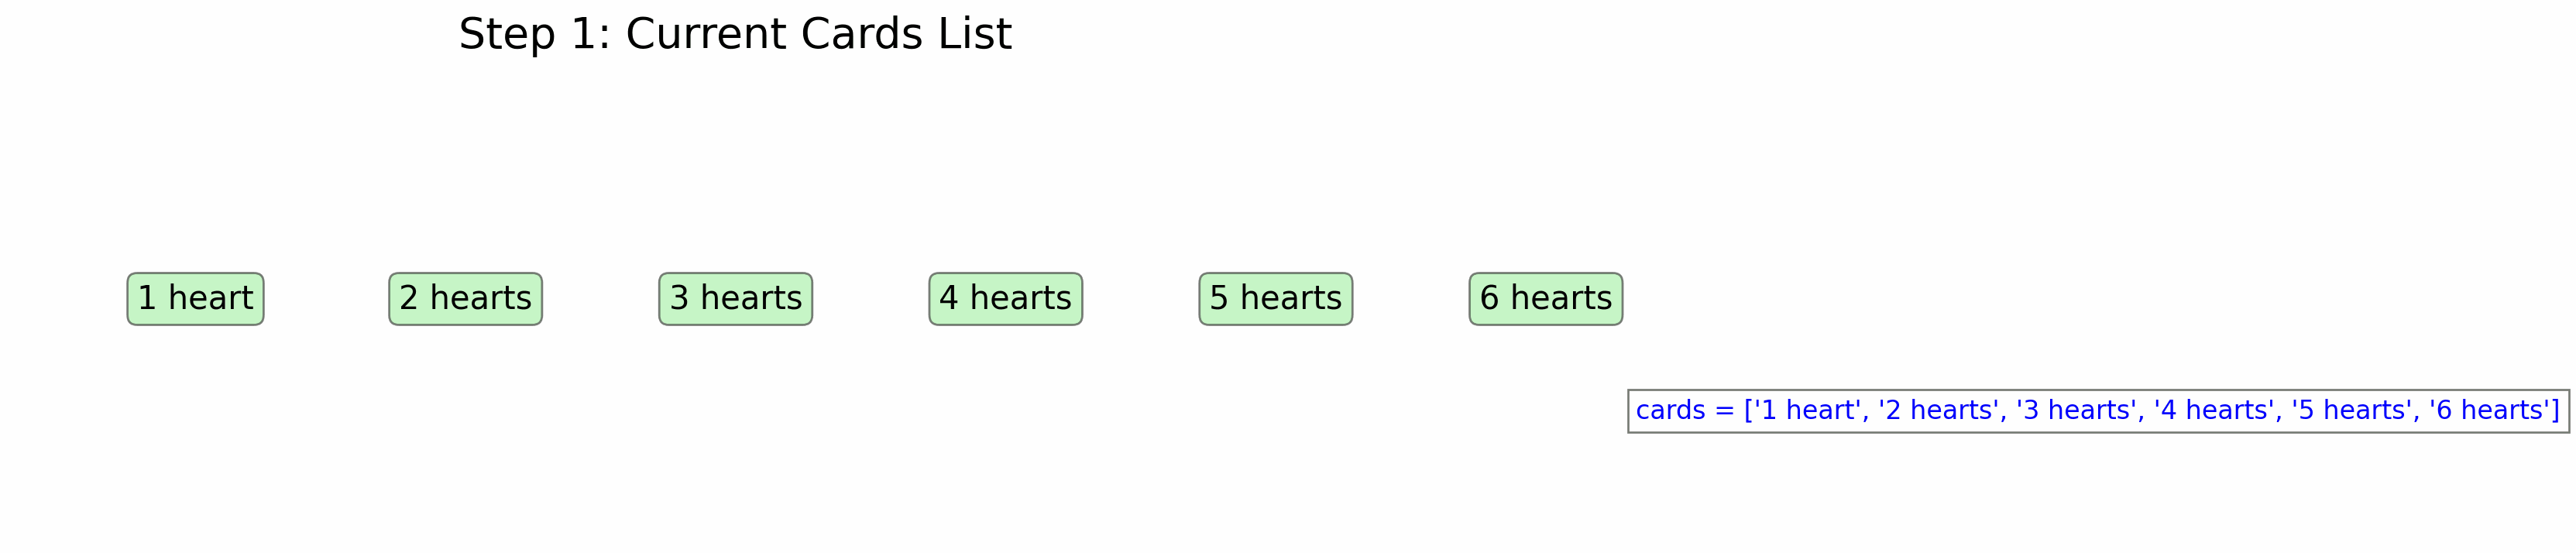

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 4))  # 增大画布高度
    ax.set_xlim(-1, len(cards) + 1)
    ax.set_ylim(-1, 1)

    # 设置元素之间的间隔
    spacing = 1.5
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=200)  # 增加 DPI
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 创建 GIF
    gif_filename = 'cards_animation.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=3.0) as writer:  # 每一步持续 3 秒
        for filename in frame_filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

    return gif_filename

# 运行动画创建
gif_filename = create_list_animation()

# 显示生成的 GIF
from IPython.display import Image
Image(filename=gif_filename)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # 使用 v2 版本以避免警告
from PIL import Image  # 导入 PIL 库
import os

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 3))  # 增大画布宽度
    ax.set_xlim(-1, len(cards) + 1)
    ax.set_ylim(-1, 1)

    # 绘制列表中的每个元素，增加间距
    spacing = 1.5  # 设置元素之间的间隔
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=100)
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 创建 MP4 视频
    video_filename = 'cards_animation.mp4'
    try:
        with imageio.get_writer(video_filename, fps=1/3.0) as writer:  # 每帧停留 3 秒
            for filename in frame_filenames:
                # 读取图像并确保它是 RGB 格式
                image = Image.open(filename).convert('RGB')  # 使用 PIL 读取并转换为 RGB
                image = image.resize((640, 480), Image.LANCZOS)  # 使用 LANCZOS 进行高质量缩放

                # 将调整后的图像转换为 NumPy 数组并添加到视频中
                writer.append_data(np.array(image))

        print(f"Video created successfully: {video_filename}")
    except Exception as e:
        print(f"Error creating video: {e}")
        return None

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

    return video_filename

# 运行动画创建
video_filename = create_list_animation()
print(f"Video filename after creation: {video_filename}")  # 打印视频文件名以便调试



Video created successfully: cards_animation.mp4
Video filename after creation: cards_animation.mp4


Video created successfully: cards_animation.mp4
Video filename after creation: cards_animation.mp4
Attempting to display video from: cards_animation.mp4


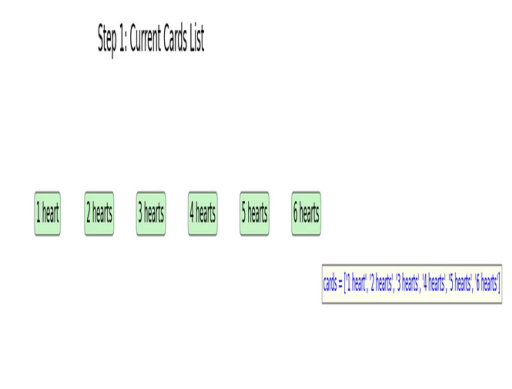

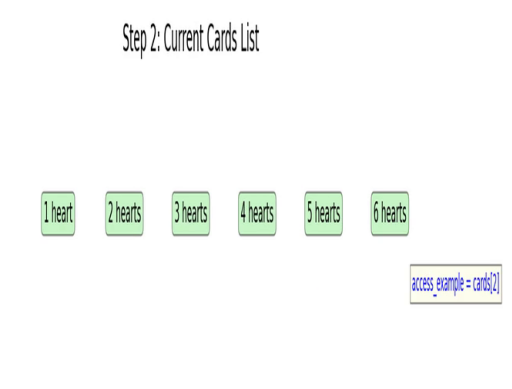

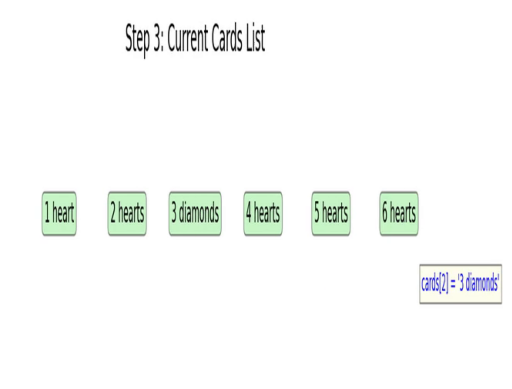

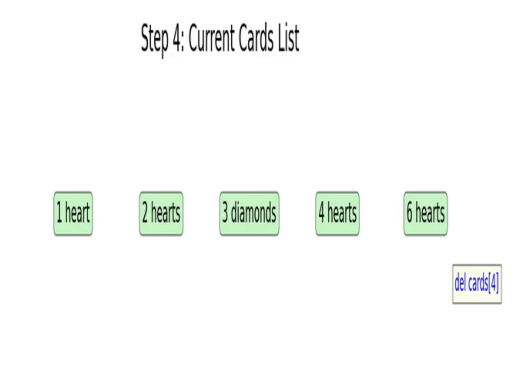

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # 使用 v2 版本以避免警告
from PIL import Image  # 导入 PIL 库
import os
import cv2  # 导入 OpenCV 库

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 3))  # 增大画布宽度
    ax.set_xlim(-1, len(cards) + 1)
    ax.set_ylim(-1, 1)

    # 设置元素之间的间隔
    spacing = 1.5
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=100)
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 创建 MP4 视频
    video_filename = 'cards_animation.mp4'
    try:
        with imageio.get_writer(video_filename, fps=1/3.0) as writer:  # 每帧停留 3 秒
            for filename in frame_filenames:
                # 读取图像并确保它是 RGB 格式
                image = Image.open(filename).convert('RGB')  # 使用 PIL 读取并转换为 RGB
                image = image.resize((640, 480), Image.LANCZOS)  # 使用 LANCZOS 进行高质量缩放

                # 将调整后的图像转换为 NumPy 数组并添加到视频中
                writer.append_data(np.array(image))

        print(f"Video created successfully: {video_filename}")
    except Exception as e:
        print(f"Error creating video: {e}")
        return None

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

    return video_filename

# 运行动画创建
video_filename = create_list_animation()
print(f"Video filename after creation: {video_filename}")  # 打印视频文件名以便调试

# 确保视频文件创建成功
if video_filename is not None:  # 检查是否为 None
    # 检查视频文件是否存在
    if os.path.exists(video_filename):
        print(f"Attempting to display video from: {video_filename}")  # 确认视频路径

        # 使用 OpenCV 播放视频
        cap = cv2.VideoCapture(video_filename)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # 转换颜色格式从 BGR 到 RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # 使用 matplotlib 显示图像
            plt.imshow(frame)
            plt.axis('off')
            plt.show(block=False)
            plt.pause(0.033)  # 控制帧速率（约 30 FPS）

        cap.release()
        cv2.destroyAllWindows()
    else:
        print(f"Video file does not exist: {video_filename}")
else:
    print("Video was not created successfully.")

Video created successfully: cards_animation.mp4
Video filename after creation: cards_animation.mp4
Attempting to display video from: cards_animation.mp4


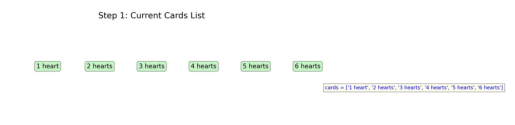

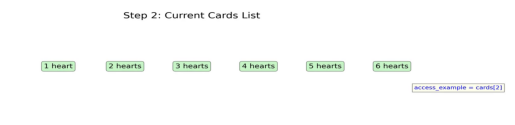

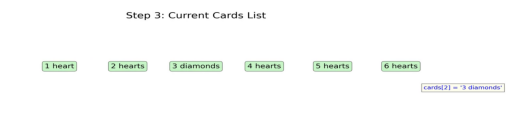

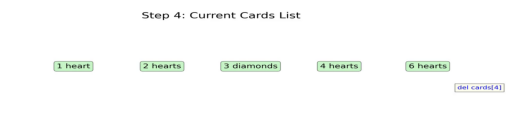

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # 使用 v2 版本以避免警告
from PIL import Image  # 导入 PIL 库
import os
import cv2  # 导入 OpenCV 库

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 4))  # 增大画布高度
    ax.set_xlim(-1, len(cards) + 1)
    ax.set_ylim(-1, 1)

    # 设置元素之间的间隔
    spacing = 1.5
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=200)  # 增加 DPI
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 创建 MP4 视频
    video_filename = 'cards_animation.mp4'
    try:
        with imageio.get_writer(video_filename, fps=1/3.0) as writer:  # 每帧停留 3 秒
            target_size = None  # 初始化目标尺寸
            for i, filename in enumerate(frame_filenames):
                # 读取图像并确保它是 RGB 格式
                image = Image.open(filename).convert('RGB')  # 使用 PIL 读取并转换为 RGB

                # 保持原始长宽比例，设置最大宽度和高度
                max_width = 1280
                max_height = 720
                img_ratio = image.width / image.height

                # 计算新的宽度和高度
                if img_ratio > max_width / max_height:
                    new_width = max_width
                    new_height = int(max_width / img_ratio)
                else:
                    new_height = max_height
                    new_width = int(max_height * img_ratio)

                # 确保宽度和高度是16的倍数
                new_width = (new_width // 16) * 16
                new_height = (new_height // 16) * 16

                # 如果是第一帧，记录目标尺寸
                if target_size is None:
                    target_size = (new_width, new_height)

                # 使用目标尺寸调整图像
                image = image.resize(target_size, Image.LANCZOS)

                # 将调整后的图像转换为 NumPy 数组并添加到视频中
                writer.append_data(np.array(image))

        print(f"Video created successfully: {video_filename}")
    except Exception as e:
        print(f"Error creating video: {e}")
        return None

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

    return video_filename

# 运行动画创建
video_filename = create_list_animation()
print(f"Video filename after creation: {video_filename}")  # 打印视频文件名以便调试

# 确保视频文件创建成功
if video_filename is not None:  # 检查是否为 None
    # 检查视频文件是否存在
    if os.path.exists(video_filename):
        print(f"Attempting to display video from: {video_filename}")  # 确认视频路径

        # 使用 OpenCV 播放视频
        cap = cv2.VideoCapture(video_filename)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # 转换颜色格式从 BGR 到 RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # 使用 matplotlib 显示图像
            plt.imshow(frame)
            plt.axis('off')
            plt.show(block=False)
            plt.pause(0.033)  # 控制帧速率（约 30 FPS）

        cap.release()
        cv2.destroyAllWindows()
    else:
        print(f"Video file does not exist: {video_filename}")
else:
    print("Video was not created successfully.")

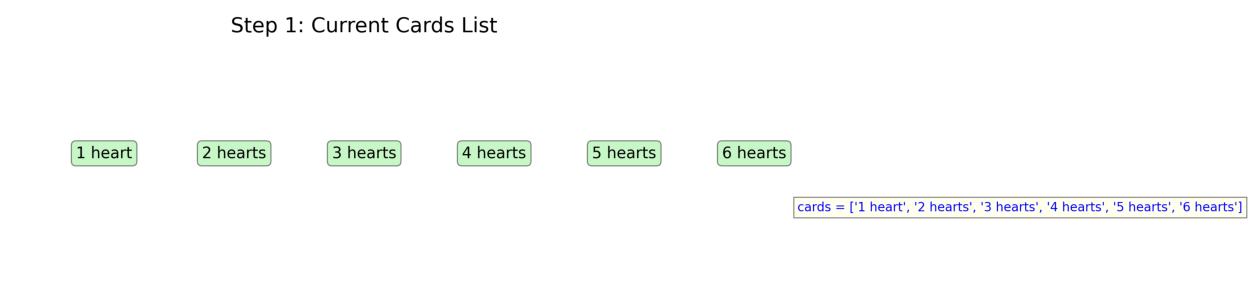

<Figure size 640x480 with 0 Axes>

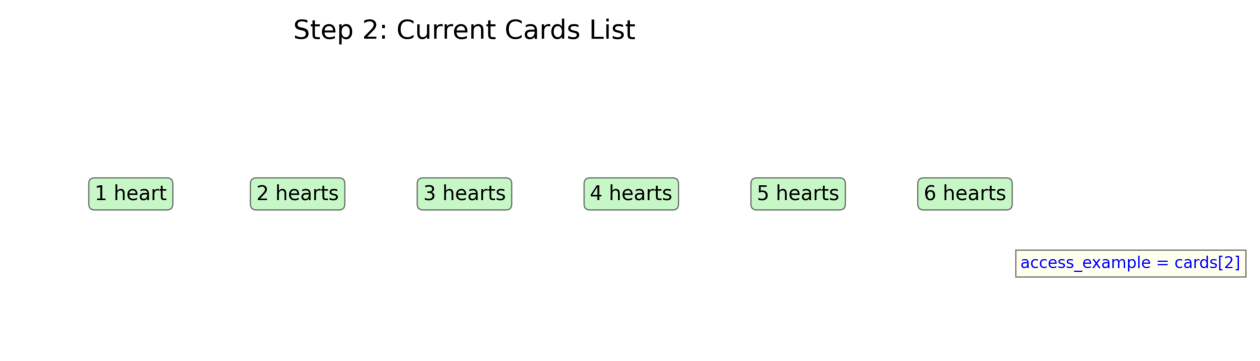

<Figure size 640x480 with 0 Axes>

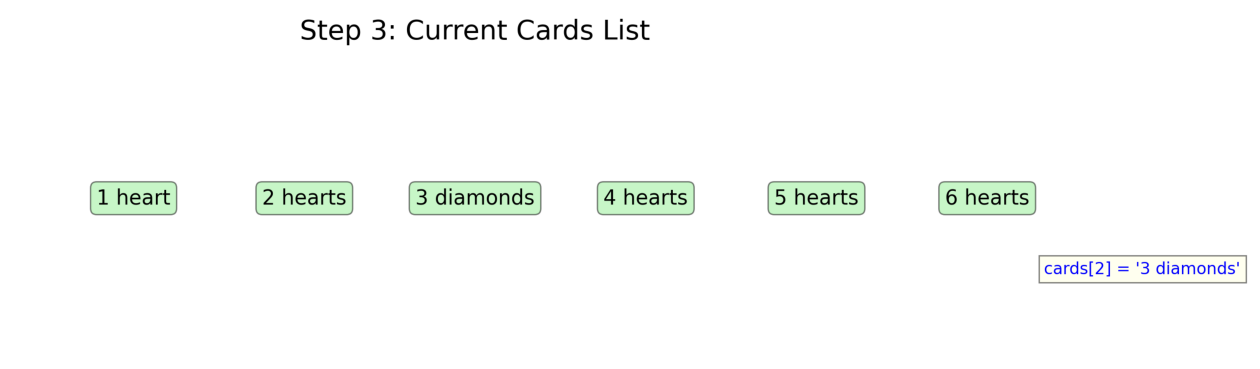

<Figure size 640x480 with 0 Axes>

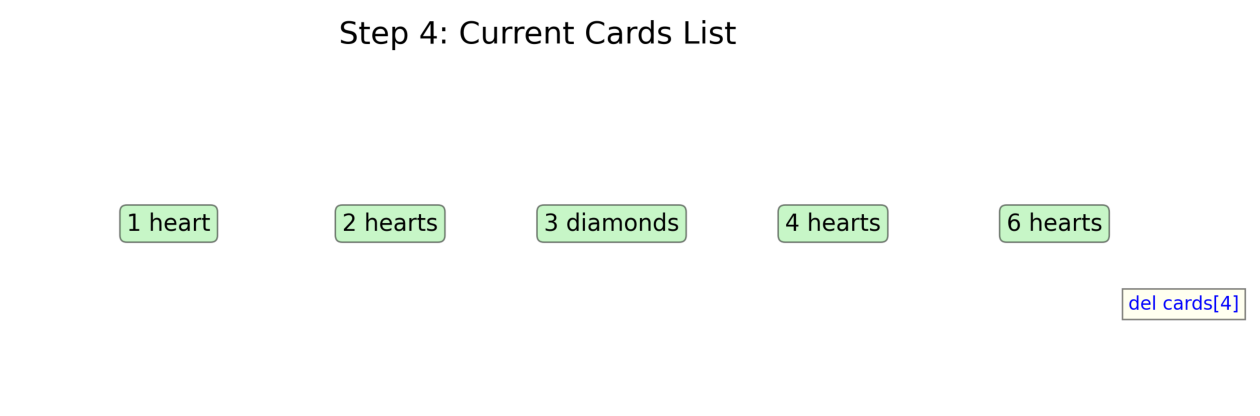

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # 导入 PIL 库
import os
import time

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 4))  # 增大画布高度
    ax.set_xlim(-1, len(cards) + 1)
    ax.set_ylim(-1, 1)

    # 设置元素之间的间隔
    spacing = 1.5
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=200)  # 增加 DPI
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 逐帧显示图像
    for filename in frame_filenames:
        # 读取图像
        image = Image.open(filename)

        # 显示图像，设置较大的显示尺寸
        plt.figure(figsize=(16, 9))  # 设置更大的显示尺寸
        plt.imshow(image)
        plt.axis('off')
        plt.show(block=False)
        plt.pause(0.001)  # 让 matplotlib 更新显示

        # 等待 3 秒
        time.sleep(3)

        # 清除当前图像
        plt.clf()

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

# 运行动画创建
create_list_animation()

['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']
['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']
['1 heart', '2 hearts', '3 diamonds', '4 hearts', '5 hearts', '6 hearts']
['1 heart', '2 hearts', '3 diamonds', '4 hearts', '6 hearts']


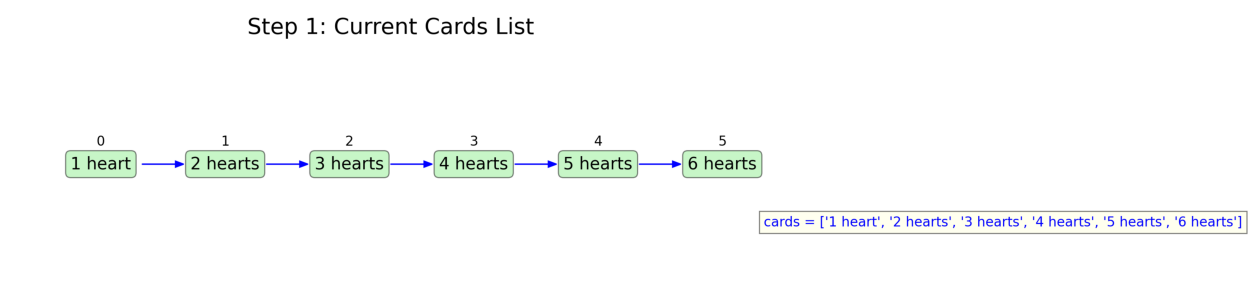

<Figure size 640x480 with 0 Axes>

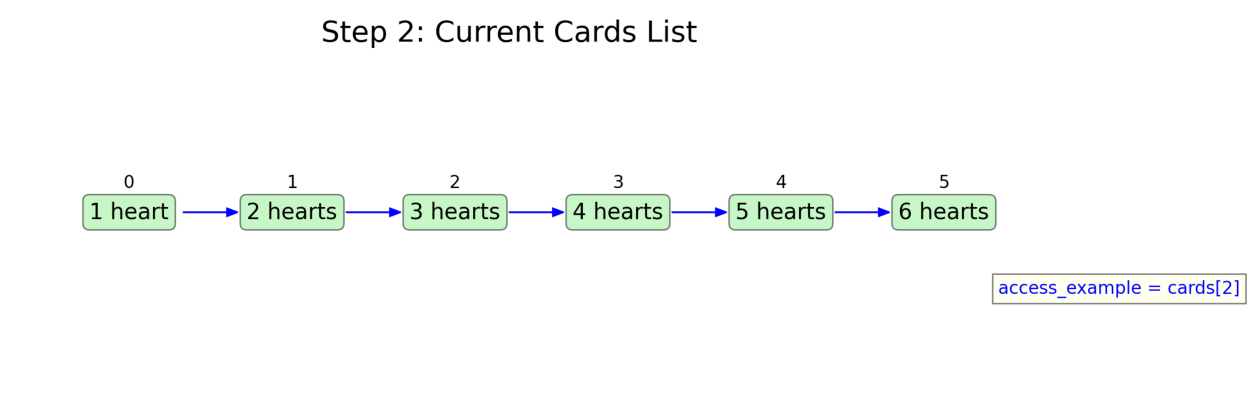

<Figure size 640x480 with 0 Axes>

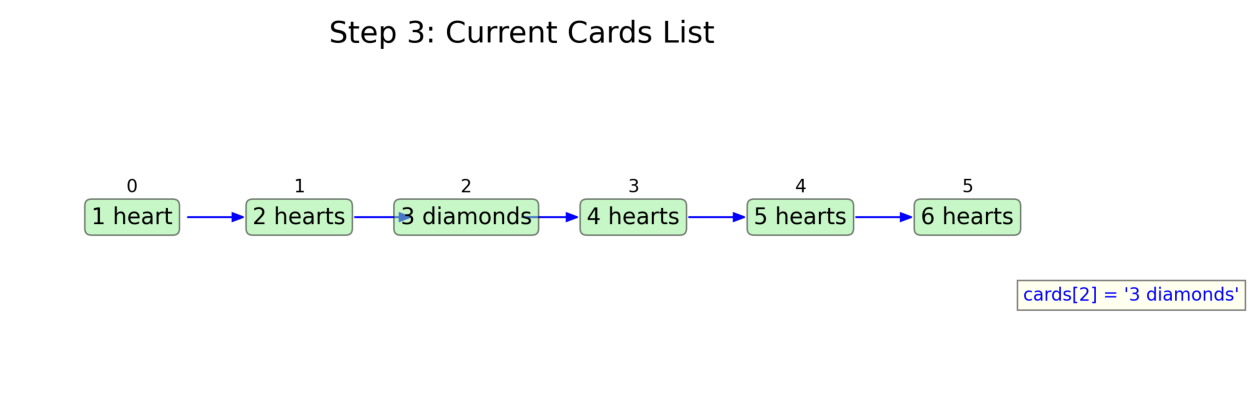

<Figure size 640x480 with 0 Axes>

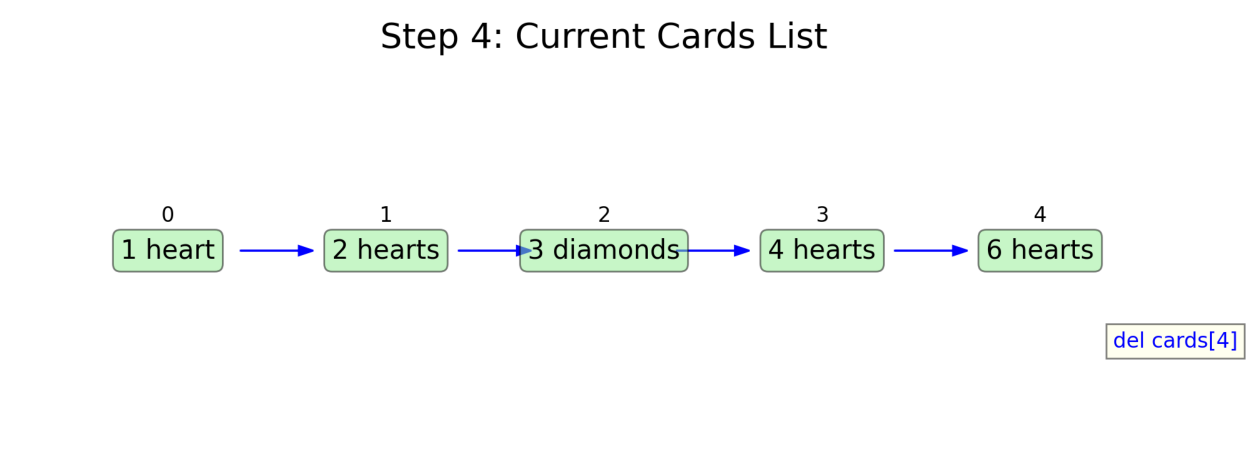

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # 导入 PIL 库
import os
import time
import copy  # 导入 copy 模块

# 创建一个函数来绘制当前列表状态
def draw_cards(cards, step, code_snippet, filename):
    fig, ax = plt.subplots(figsize=(12, 4))  # 增大画布高度
    ax.set_xlim(-1, len(cards) + 2) # 此处小心：由于cards删除掉过一个元素（长度不是+1而是+2）
    ax.set_ylim(-1, 1)

    # 设置元素之间的间隔
    spacing = 1.5
    for i, card in enumerate(cards):
        ax.text(i * spacing, 0, card, fontsize=15, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))
        ax.annotate(str(i), xy=(i * spacing, 0.15), fontsize=12, ha='center', color='black')  # 标记索引

        # 计算箭头的起点和终点，避免与元素边界重叠
        arrow_start = i * spacing + 0.5  # 箭头起点
        if i < len(cards) - 1:  # 只在元素之间画箭头
            arrow_end = (i + 1) * spacing - 0.5  # 箭头终点
            ax.arrow(arrow_start, 0, arrow_end - arrow_start, 0, head_width=0.05, head_length=0.1,
                     fc='blue', ec='blue', length_includes_head=True)

    ax.set_title(f"Step {step}: Current Cards List", fontsize=20)
    ax.axis('off')

    # 添加关键代码
    ax.text(len(cards) * spacing - 1, -0.5, code_snippet, fontsize=12, ha='left', color='blue',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

    # 保存当前帧
    plt.savefig(filename, bbox_inches='tight', dpi=200)  # 增加 DPI
    plt.close(fig)

# 创建列表的动画
def create_list_animation():
    steps = []  # 用于存储每一步的状态
    cards = []  # 初始化空列表

    # 第一步：创建列表
    cards = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts", "6 hearts"]
    steps.append((cards.copy(), "cards = ['1 heart', '2 hearts', '3 hearts', '4 hearts', '5 hearts', '6 hearts']"))

    # 第二步：访问列表中的元素
    access_example = cards[2]  # 访问第三个元素
    steps.append((cards.copy(), "access_example = cards[2]"))

    # 第三步：修改列表中的元素
    cards[2] = "3 diamonds"  # 修改第三个元素
    steps.append((cards.copy(), "cards[2] = '3 diamonds'"))

    # 第四步：删除元素
    del cards[4]  # 删除第五个元素
    steps.append((cards.copy(), "del cards[4]"))

    # 绘制每一步
    frame_filenames = []
    for i, (step, code) in enumerate(steps):
        filename = f'frame_{i}.png'
        print(step)
        draw_cards(step, i + 1, code, filename)
        frame_filenames.append(filename)

    # 逐帧显示图像
    for filename in frame_filenames:
        # 读取图像
        image = Image.open(filename)

        # 显示图像，设置较大的显示尺寸
        plt.figure(figsize=(16, 9))  # 设置更大的显示尺寸
        plt.imshow(image)
        plt.axis('off')
        plt.show(block=False)
        plt.pause(0.001)  # 让 matplotlib 更新显示

        # 等待 3 秒
        time.sleep(3)

        # 清除当前图像
        plt.clf()

    # 删除临时帧文件
    for filename in frame_filenames:
        os.remove(filename)

# 运行动画创建
create_list_animation()